In [1]:
import requests
import json
from bs4 import BeautifulSoup
from IPython.display import clear_output
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import matplotlib.mlab as mlab
import numpy as np
import seaborn as sns
import itertools
from __future__ import unicode_literals
import matplotlib

### Load from JSON

In [5]:
with open ('scraped_games.json', 'r') as f:
    actual_games = json.load(f)

# Graphs

## Games on each platform

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning:

 This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.




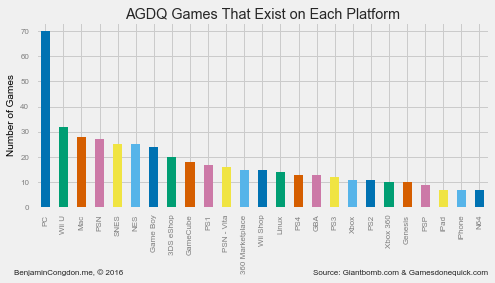

In [7]:
matplotlib.use('agg')
%matplotlib inline  

plt.style.use('fivethirtyeight')

plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'normal'

plt.rcParams['xtick.color'] = 'grey'
plt.rcParams['ytick.color'] = 'grey'
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['figure.titlesize'] = 12

palette = itertools.cycle(sns.color_palette('colorblind', 25))

platforms = list()
for game in actual_games:
    if 'platforms' in game['data'] and game['data']['platforms']:
        platforms += ([x['name'] for x in game['data']['platforms']])
platforms = pd.Series(platforms)
figure = plt.figure(figsize=(720/100, 475/100), dpi=100)
ax = platforms.value_counts()[:25].plot(kind='bar', color = [palette.next() for x in range(25)])
shortnames = ['PC', 'Wii U', 'Mac', 'PSN', 'SNES' ,'NES', 'Game Boy', '3DS eShop', 'GameCube',
             'PS1', 'PSN - Vita', '360 Marketplace', 'Wii Shop', 'Linux', 'PS4', 'GBA', 'PS3',
              'Xbox', 'PS2', 'Xbox 360', 'Genesis', 'PSP', 'iPad', 'iPhone', 'N64'] 
ax.set_xticklabels(shortnames)

for x in range(25):
    ax.get_xticklabels()[x].title = shortnames
plt.ylabel('Number of Games')
plt.title("AGDQ Games That Exist on Each Platform")
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.text(1, -0.35,'Source: Giantbomb.com & Gamesdonequick.com',
     horizontalalignment='right',
     verticalalignment='center',
     transform = ax.transAxes,
     fontsize=8)
print 
ax.text(-.05, -0.35, 'BenjaminCongdon.me, © 2016',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes,
     fontsize=8)
plt.tight_layout()
plt.savefig('./img/general_platform_counts.png', bbox_inches='tight', dpi=100)
plt.savefig('./render/general_platform_counts.png', bbox_inches='tight', dpi=500)

## Release Year Histogram


Earliest Release
title                 Dragon's Lair
duration            0 days 00:18:00
runner                        SCXCR
platform                        NES
release_date    1983-07-01 00:00:00
Name: 101, dtype: object

Latest Release
title               The Turing Test
duration            0 days 00:45:00
runner                       Azorae
platform                         PC
release_date    2016-08-30 00:00:00
Name: 14, dtype: object

Min Duration
title                       Refunct
duration            0 days 00:05:00
runner               097Aceofspades
platform                         PC
release_date    2015-10-16 00:00:00
Name: 130, dtype: object

Max Duration
title                 Final Fantasy
duration            0 days 04:10:00
runner                 feasel, Gyre
platform                        PS1
release_date    1987-12-18 00:00:00
Name: 67, dtype: object


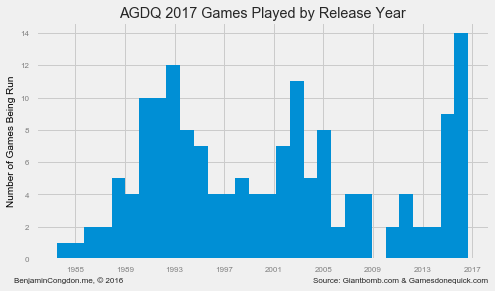

In [8]:

actual_games[0]['data']
game_frame = pd.DataFrame()

game_frame['title'] = [x['title'] for x in actual_games]
game_frame['duration'] = [str(x['duration']) for x in actual_games]
game_frame['runner'] = [x['runner'] for x in actual_games]
game_frame['platform'] = [x['platform'] for x in actual_games]
game_frame['release_date'] = [x['data']['original_release_date'] if 'original_release_date' 
                           in x['data'] else None for x in actual_games]
game_frame['release_date'] = pd.to_datetime(game_frame['release_date'])
game_frame['duration'] = pd.to_timedelta(game_frame['duration'])

print "\nEarliest Release"
print game_frame.ix[game_frame['release_date'].idxmin()]
print "\nLatest Release"
print game_frame.ix[game_frame['release_date'].idxmax()]

print "\nMin Duration"
print game_frame.ix[game_frame['duration'].idxmin()]
print "\nMax Duration"
print game_frame.ix[game_frame['duration'].idxmax()]

figure = plt.figure(figsize=(720/100, 475/100), dpi=100)
ax = game_frame['release_date'].hist(bins=30)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#plt.xlabel('Release Year')
plt.title('AGDQ 2017 Games Played by Release Year')
plt.ylabel('Number of Games Being Run')
ax.text(1, -0.09,'Source: Giantbomb.com & Gamesdonequick.com',
     horizontalalignment='right',
     verticalalignment='center',
     transform = ax.transAxes,
     fontsize=8)
ax.text(-.05, -0.09,'BenjaminCongdon.me, © 2016',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes,
     fontsize=8)
plt.tight_layout()
plt.savefig("./img/num_games_by_year.png", bbox_inches='tight', dpi=100)
plt.savefig("./render/num_games_by_year.png", bbox_inches='tight', dpi=350)

## Release Year vs. Playtime

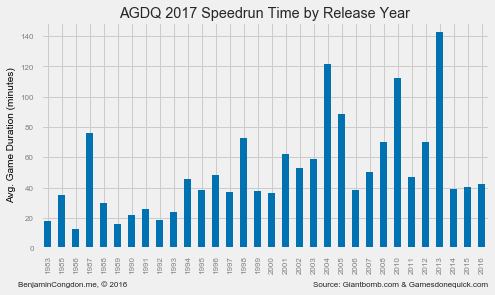

In [9]:
duration_grouped = game_frame.groupby(lambda x: game_frame.ix[x]['release_date'].year)
duration_by_year = duration_grouped.aggregate(np.sum)['duration'].astype('timedelta64[m]')
mean_duration_by_year = duration_by_year / duration_grouped.count()['duration']
figure = plt.figure(figsize=(720/100, 475/100), dpi=100)
ax = mean_duration_by_year.plot(kind='bar', color = sns.color_palette('colorblind', 25)[0])
xtl = [item.get_text()[:4] for item in ax.get_xticklabels()]
_=ax.set_xticklabels(xtl)
#plt.xlabel("Release Year")
plt.ylabel("Avg. Game Duration (minutes)")
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.text(1, -0.16,'Source: Giantbomb.com & Gamesdonequick.com',
     horizontalalignment='right',
     verticalalignment='center',
     transform = ax.transAxes,
     fontsize=8)
ax.text(-.05, -0.16,'BenjaminCongdon.me, © 2016',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes,
     fontsize=8)


plt.title("AGDQ 2017 Speedrun Time by Release Year")
plt.tight_layout()

plt.savefig("./img/time_by_release_date.png", bbox_inches='tight', dpi=100)
plt.savefig("./render/time_by_release_date.png", bbox_inches='tight', dpi=350)

## Speed Run Scatter

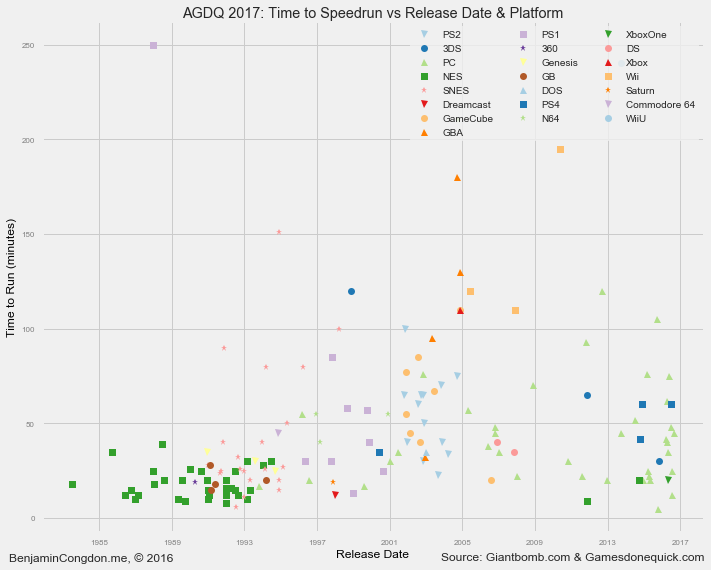

In [10]:
game_frame['minutes'] = game_frame['duration'].astype('timedelta64[m]')
game_frame_corrected = game_frame[pd.notnull(game_frame['release_date'])]
game_frame_corrected = game_frame_corrected.reset_index()
import itertools

platforms = game_frame_corrected['platform'].unique()
palette = itertools.cycle(sns.color_palette('Paired', 21))
color_dict = dict()
for p in platforms:
    color_dict[p] = palette.next()
def map_platform(platform):
    if platform in color_dict:
        return color_dict[platform]
    else:
        return "r"
    
mapped_platforms = list(map_platform(x) for x in game_frame_corrected['platform'])


markers = itertools.cycle(['v', 'o', '^', 's', '*'])

fig, ax = plt.subplots(figsize=(10,8))

for platform in platforms:
    plt_series = game_frame_corrected[game_frame_corrected['platform'] == platform]
    ax.plot_date(x=plt_series.release_date, y=plt_series.minutes,
                  color=map_platform(platform),
                  label=platform, marker=markers.next(), linewidth=1)
plt.xlabel("Release Date", fontsize=12)
plt.ylabel("Time to Run (minutes)", fontsize=12)
legend = ax.legend(loc="upper right", frameon = True, ncol=3)
legend.get_frame().set_linewidth(0)
legend.get_frame().set_facecolor("#F0F0F0")
plt.title("AGDQ 2017: Time to Speedrun vs Release Date & Platform")
ax.text(1, -0.05,'Source: Giantbomb.com & Gamesdonequick.com',
     horizontalalignment='right',
     verticalalignment='center',
     transform = ax.transAxes,
     fontsize=12)
ax.text(-.05, -0.05,'BenjaminCongdon.me, © 2016',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes,
     fontsize=12)
plt.tight_layout()
plt.savefig('./img/running_time_v_release_date.png', bbox_inches='tight', dpi=70)
plt.savefig('./render/running_time_v_release_date.png', bbox_inches='tight', dpi=350)

## Actual Platform Bar Chart

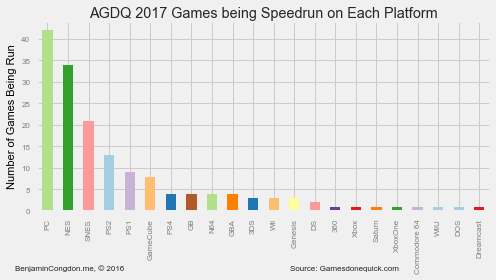

In [13]:
counts = game_frame['platform'].value_counts()
colors_for_graph = [map_platform(x) for x in counts.index]
fig, ax = plt.subplots(figsize=(720/100, 475/100), dpi=100)
ax = game_frame['platform'].value_counts().plot(kind='bar', color = colors_for_graph)
# plt.xlabel("Platform", fontsize=10)
plt.ylabel("Number of Games Being Run", fontsize=11)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.text(.8, -0.3,'Source: Gamesdonequick.com',
     horizontalalignment='right',
     verticalalignment='center',
     transform = ax.transAxes,
     fontsize=8)
ax.text(-.05, -0.3,'BenjaminCongdon.me, © 2016',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes,
     fontsize=8)
plt.title("AGDQ 2017 Games being Speedrun on Each Platform")
plt.tight_layout()
plt.savefig('./img/platforms_run.png', bbox_inches='tight', dpi=100)
plt.savefig('./render/platforms_run.png', bbox_inches='tight', dpi=350)

## Running Time Histogram

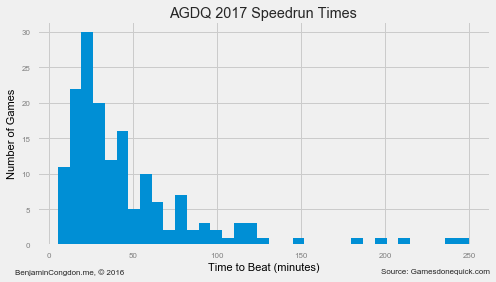

In [18]:
figure = plt.figure(figsize=(720/100, 475/100), dpi=100)

ax = game_frame['minutes'].hist(bins=35)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.xlabel("Time to Beat (minutes)", fontsize=11)
plt.ylabel("Number of Games", fontsize=11)
plt.title("AGDQ 2017 Speedrun Times")
ax.text(1, -0.12,'Source: Gamesdonequick.com',
     horizontalalignment='right',
     verticalalignment='center',
     transform = ax.transAxes,
     fontsize=8)
ax.text(-.05, -0.12,'BenjaminCongdon.me, © 2016',
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes,
     fontsize=8)
plt.tight_layout()
plt.savefig('./img/time_to_run_histogram.png', bb_inches='tight', dpi=100)
plt.savefig('./render/time_to_run_histogram.png', bb_inches='tight', dpi=350)

## CSV for D3.js

In [15]:
import codecs
with codecs.open("games_list.csv", "w+", encoding='utf8') as f:
    game_frame.drop('duration', axis=1).to_csv(f) # 'Minutes' will be more useful

## Pyplot Scatter

In [19]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

N = 500

trace = go.Scatter(
    x = np.random.randn(N),
    y = np.random.randn(N)+2,
    name = 'Above',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

data = trace

layout = dict(title = 'AGDQ Scatter',
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')


PlotlyError: Invalid 'figure_or_data' argument. Plotly will not be able to properly parse the resulting JSON. If you want to send this 'figure_or_data' to Plotly anyway (not recommended), you can set 'validate=False' as a plot option.
Here's why you're seeing this error:

'data' has invalid value inside 'figure'

Path To Error: ['data']

Current path: []
Current parent object_names: []

Additionally:

    role: object

